
Based on https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2021.640725/full

The rationale for the Over Amplification Rate measure
Since out-of-frame TCR/BCR rearrangements do not form a functional receptor, they are not subjected to any specific clonal expansions and selection (Murugan et al., 2012). Being a passenger genomic variation, they change their initial (recombinational) clonal frequencies just randomly following the frequency changes of the second functional (in-frame) TCR/BCR allele present in the same T/B cell clone. According to the TCR/BCR loci rearrangement mechanism, the formation of in-frame and out-of-frame allele combinations in the same cell is also a stochastic and independent process in terms of V- and J-genes frequency. It leads to the conclusion that V- and J-gene frequencies among out-of-frame rearrangements must be sufficiently stable and must be equal to the initial recombination frequencies despite repertoire changes caused by various immune challenges (Figure 1). Thus, reproducible deviation of out-of-frame V- and J-gene frequencies (for the same multiplex PCR primer set) from the initial recombinational frequencies observed in the sequenced repertoire dataset is a result of artificial aberration caused by PCR amplification rather than immune repertoire evolution. Thus out-of-frame clonotypes can be considered a natural calibrator that can be used to measure amplification bias and quantitatively correct immune repertoire data.

# Import

In [15]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Input data

In [97]:
## multiplex, without UMI

path = '/home/mgikalo/projects/rnrmu_p1/cfse1_reanalyze/mixcr/p1-KRAS-1-mut-CD8-CFSElo-beta-chain.clones_TRB.tsv'

In [98]:
df1 = pd.read_csv(path, sep='\t')

# transform V- and J-segments format

df1['Vsegm'] = [x.split('*')[0] for x in df1.allVHitsWithScore]
df1['Jsegm'] = [x.split('*')[0] for x in df1.allJHitsWithScore]

# leave only necessary columns in df
df1 = df1[['aaSeqCDR3', 'nSeqCDR3', 'Vsegm', 'Jsegm', 'readCount']]

# manage duplicates
df1 = df1.groupby(['aaSeqCDR3', 'nSeqCDR3', 'Vsegm', 'Jsegm'], as_index=False)\
                .agg({'readCount' : 'sum'})\
                .sort_values('readCount', ascending=False)\
                .reset_index(drop=True)

# remove all clonotypes having 1 read
# because of this:
# "1.8 (for MPlex) and 2.5 (for RACE) reads per out-of-frame clonotype are a minimal sufficient sequencing coverage to get adequate OAR values with an acceptable error rate of ~10%"
df1 = df1.loc[df1.readCount>1]

df1

,aaSeqCDR3,nSeqCDR3,Vsegm,Jsegm,readCount
0,CASSFGLGGGPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGCCCTTACAATGAGCAGT...,TRBV11-2,TRBJ2-1,186467.0
1,CASSPSDR_GRLETQYF,TGCGCCAGCAGTCCATCCGACAGGGGGCAGGTTGGAGACCCAGTACTTC,TRBV23-1,TRBJ2-5,68198.0
2,CASSRDPSVNSYNEQFF,TGCGCCAGCAGCCGGGACCCCTCCGTCAACTCCTACAATGAGCAGT...,TRBV4-1,TRBJ2-1,28523.0
3,CASGTGAGVYEQYF,TGTGCCAGCGGTACAGGCGCAGGTGTGTACGAGCAGTACTTC,TRBV13,TRBJ2-7,15917.0
4,CASSFGLG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGCCCTTACAATGAGCAGTT...,TRBV11-2,TRBJ2-1,12665.0
...,...,...,...,...,...
260,CASSFGLRG_GPHNEQFF,TGTGCCAGCAGCTTTGGACTGAGGGGGGGGCCCTCACAATGAGCAG...,TRBV11-2,TRBJ2-1,2.0
261,CASSHWTSG_GVYTDTQYF,TGCGCCAGCAGTCACTGGACTAGCGGGGGGGGTATACACAGATACG...,TRBV4-1,TRBJ2-3,2.0
262,RASSRDPSVNSYNEQFF,CGCGCCAGCAGCCGGGACCCCTCCGTTAACTCCTACAATGAGCAGT...,TRBV4-1,TRBJ2-1,2.0
263,CASSFRST_**KTVFF,TGTGCCAGCAGTTTCAGGTCGACAACTAATGAAAAACTGTTTTTTTT,TRBV28,TRBJ1-4,2.0


# Select non-functional clonotypes

In [99]:
## All clonotypes
len([x for x in df1.aaSeqCDR3])

265

In [100]:
## functional clonotypes
len([x for x in df1.aaSeqCDR3 if x.isalpha()])

171

In [101]:
## non-functional clonotypes
non_f = [x for x in df1.aaSeqCDR3 if x.isalpha()==0]
len([x for x in df1.aaSeqCDR3 if x.isalpha()==0])

94

In [102]:
## how many non-functional clonotypes in each V-segment?
df1.loc[df1.aaSeqCDR3.isin(non_f)]\
        .groupby('Vsegm').agg({'aaSeqCDR3' : 'count'})\
        .sort_values('aaSeqCDR3', ascending=False)

,aaSeqCDR3
Vsegm,
TRBV11-2,41
TRBV23-1,23
TRBV28,10
TRBV4-1,8
TRBV10-2,2
TRBV13,2
TRBV20-1,2
TRBV4-2,2
TRBV12-3,1


In [103]:
## how many non-functional clonotypes in each J-segment?
df1.loc[df1.aaSeqCDR3.isin(non_f)]\
        .groupby('Jsegm').agg({'aaSeqCDR3' : 'count'})\
        .sort_values('aaSeqCDR3', ascending=False)

,aaSeqCDR3
Jsegm,
TRBJ2-1,47
TRBJ2-5,22
TRBJ2-7,8
TRBJ1-4,6
TRBJ2-3,4
TRBJ1-2,3
TRBJ2-6,2
TRBJ1-5,1
TRBJ2-4,1


In [104]:
## df for non-func clonotypes
df_nf = df1.loc[df1.aaSeqCDR3.isin(non_f)].sort_values('readCount').reset_index(drop=True)

## Discard the most abundant non-functional clonotype
df_nf = df_nf.iloc[:-1]
df_nf

,aaSeqCDR3,nSeqCDR3,Vsegm,Jsegm,readCount
0,RASSLRGG_GSYEQYF,CGTGCCAGCAGTTTAAGGGGGGGGCGGTTCCTACGAGCAGTACTTC,TRBV28,TRBJ2-7,2.0
1,CAKALDWG_GPYNEQFF,TGTGCCAAAGCTTTGGACTGGGGGGGGCCCTTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,2.0
2,CASSPSDS_GRSETQYF,TGCGCCAGCAGTCCATCCGACAGCTGGGCAGGTCGGAGACCCAGTA...,TRBV23-1,TRBJ2-5,2.0
3,CSARDGG_GAYEQYF,TGCAGTGCTAGAGATGGAGGGGGGGGCCTACGAGCAGTACTTC,TRBV20-1,TRBJ2-7,2.0
4,CAGSFGPG_GPYNEQFF,TGTGCCGGCAGCTTTGGACCGGGGGGGGCCCTTACAATGAGCAGTT...,TRBV11-2,TRBJ2-1,2.0
...,...,...,...,...,...
88,CASSFGLG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGCCTTACAATGAGCAGTT...,TRBV11-2,TRBJ2-1,318.0
89,CASSFGLG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGCCCTTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,478.0
90,CASSFGLGG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGGGCCCTTACAATGAGCA...,TRBV11-2,TRBJ2-1,573.0
91,CASSFGLGG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGGCCCTTACAATGAGCAG...,TRBV11-2,TRBJ2-1,9750.0


In [105]:
## df for func clonotypes
df_f = df1.loc[~df1.aaSeqCDR3.isin(non_f)].sort_values('readCount').reset_index(drop=True)
df_f

,aaSeqCDR3,nSeqCDR3,Vsegm,Jsegm,readCount
0,RASSRDPSVNSYNEQFF,CGCGCCAGCAGCCGGGACCCCTCCGTTAACTCCTACAATGAGCAGT...,TRBV4-1,TRBJ2-1,2.0
1,CSVERAPWDEQFF,TGCAGCGTTGAGCGGGCCCCTTGGGATGAGCAGTTCTTC,TRBV29-1,TRBJ2-1,2.0
2,CSARDTQGPHYGYTS,TGCAGTGCTAGAGATACACAGGGACCCCACTATGGCTACACCTCC,TRBV20-1,TRBJ1-2,2.0
3,CASSPSDRGRLGTQYF,TGCGCCAGCAGTCCATCCGACAGGGGCAGGTTGGGGACCCAGTACTTC,TRBV23-1,TRBJ2-5,2.0
4,CTSSPSDRGRLETQYF,TGCACCAGCAGTCCATCCGACAGGGGCAGGTTGGAGACCCAGTACTTC,TRBV23-1,TRBJ2-5,2.0
...,...,...,...,...,...
166,CASSFGGIGGHEQFF,TGTGCCAGCTCCTTTGGCGGGATCGGAGGCCATGAGCAGTTCTTC,TRBV19,TRBJ2-1,3192.0
167,CASSQGISGANVLTF,TGTGCCAGCAGCCAGGGGATCTCTGGGGCCAACGTCCTGACTTTC,TRBV4-2,TRBJ2-6,5684.0
168,CASGTGAGVYEQYF,TGTGCCAGCGGTACAGGCGCAGGTGTGTACGAGCAGTACTTC,TRBV13,TRBJ2-7,15917.0
169,CASSRDPSVNSYNEQFF,TGCGCCAGCAGCCGGGACCCCTCCGTCAACTCCTACAATGAGCAGT...,TRBV4-1,TRBJ2-1,28523.0


In [28]:
f = df1[['aaSeqCDR3', 'nSeqCDR3', 'readCount']].loc[~df1.aaSeqCDR3.isin(non_f)].nSeqCDR3.to_list()
f

['TGTGCCAGCAGCTTTGGACTGGGGGGGGGCCCTTACAATGAGCAGTTCTTC',
 'TGCGCCAGCAGTCCATCCGACAGGGGGCAGGTTGGAGACCCAGTACTTC',
 'TGCGCCAGCAGCCGGGACCCCTCCGTCAACTCCTACAATGAGCAGTTCTTC',
 'TGTGCCAGCGGTACAGGCGCAGGTGTGTACGAGCAGTACTTC',
 'TGTGCCAGCAGCTTTGGACTGGGGGGGGCCCTTACAATGAGCAGTTCTTC',
 'TGTGCCAGCAGCTTTGGACTGGGGGGGGGGCCCTTACAATGAGCAGTTCTTC',
 'TGTGCCAGCAGCCAGGGGATCTCTGGGGCCAACGTCCTGACTTTC',
 'TGTGCCAGCTCCTTTGGCGGGATCGGAGGCCATGAGCAGTTCTTC',
 'TGTGCCAGCAGCTCCGGACTAGGTTACTACGAGCAGTACTTC',
 'TGTGCCAGCAGCTGGGACAGTCCCTACGAGCAGTACTTC',
 'TGTGCCAGCAGCTTGGGTCCTGGGGCCAACGTCCTGACTTTC',
 'TGTGCCACCAGCAGAGATGCGGGGGCCTTCAATGAGCAGTTCTTC',
 'TGTGCCAGCAGCTTTGGACTGGGGGGGGGGCCTTACAATGAGCAGTTCTTC',
 'TGTGCCAGCAGCTTTGGACTGGGGGGGGGCCCTTACAATGAGCAGTTCCTC',
 'TGTGCCAGCAGCTTTGGACTGGGGGGGGGCCCTTACAATGAGCAGCTCTTC',
 'TGTGCCAGCAGCCTTGGACTGGGGGGGGGCCCTTACAATGAGCAGTTCTTC',
 'TGTGCCAGCAGCTTTGGGCTGGGGGGGGGCCCTTACAATGAGCAGTTCTTC',
 'TGTGCCAGCAGCTTTGGACTGGGGGGGGGCCCTTACAATGGGCAGTTCTTC',
 'TGTGCCAGCAGCTTTGGACTGGGGGGGGGCCCTTACAATGAGCAGTCCT

# Search for in-frame/out of frame pairs with Levenstein distance == 1

Search for in-frame and out-of-frame clone pairs which differ by one indel (Levenshtein distance = 1).
If their ratio is less than 1:500, the smaller clone in pair is discarded, and its count is added to the count of the larger clone
(this procedure guarantees to discard most sequencing errors present in 1 per 1000 nucleotides average)
* предлагаю пренебречь прибавлением каунтов для сокращения вычислений

## Levenstein distance

https://blog.paperspace.com/implementing-levenshtein-distance-word-autocomplete-autocorrect/

In [106]:
def levenshteinDistanceDP(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    #printDistances(distances, len(token1), len(token2))
    return distances[len(token1)][len(token2)]

In [ ]:
## split the df into functional and non-functional
## calculate levenstein distances
## if levenstein distance == 1 :
# compare redCounts
# if readCount > 1:500 : delete row in non-func and add it's readCount to the other

In [107]:
for i, row in df_nf.iterrows():
    for j, rw in df_f.iterrows():
        if levenshteinDistanceDP(row.nSeqCDR3, rw.nSeqCDR3) == 1:
            if row.readCount / rw.readCount > 500:
                df_f = df_f.drop(j)
                row.readCount += rw.readCount
            elif rw.readCount / row.readCount > 500:
                df_nf = df_nf.drop(i)
                rw.readCount += row.readCount

In [120]:
## assign 0 to func and 1 to non-func clonotypes
df_nf['is_nf'] = 1
df_f['is_nf'] = 0

## join dfs
df = pd.concat([df_f, df_nf]).reset_index(drop=True)
df

,aaSeqCDR3,nSeqCDR3,Vsegm,Jsegm,readCount,is_nf
0,RASSRDPSVNSYNEQFF,CGCGCCAGCAGCCGGGACCCCTCCGTTAACTCCTACAATGAGCAGT...,TRBV4-1,TRBJ2-1,2.0,0
1,CSVERAPWDEQFF,TGCAGCGTTGAGCGGGCCCCTTGGGATGAGCAGTTCTTC,TRBV29-1,TRBJ2-1,2.0,0
2,CSARDTQGPHYGYTS,TGCAGTGCTAGAGATACACAGGGACCCCACTATGGCTACACCTCC,TRBV20-1,TRBJ1-2,2.0,0
3,CASSPSDRGRLGTQYF,TGCGCCAGCAGTCCATCCGACAGGGGCAGGTTGGGGACCCAGTACTTC,TRBV23-1,TRBJ2-5,2.0,0
4,CTSSPSDRGRLETQYF,TGCACCAGCAGTCCATCCGACAGGGGCAGGTTGGAGACCCAGTACTTC,TRBV23-1,TRBJ2-5,2.0,0
...,...,...,...,...,...,...
256,CASSPSDR_GRLEAQYF,TGCGCCAGCAGTCCATCCGACAGGGGGCAGGTTGGAGGCCCAGTACTTC,TRBV23-1,TRBJ2-5,233.0,1
257,CASSFGLG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGCCCTTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,478.0,1
258,CASSFGLGG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGGGCCCTTACAATGAGCA...,TRBV11-2,TRBJ2-1,573.0,1
259,CASSFGLGG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGGCCCTTACAATGAGCAG...,TRBV11-2,TRBJ2-1,9750.0,1


# Calculate OARs

## For V-segment

In [117]:
# calculate OAR for each V-segment
dfv = df.query('is_nf==1')\
        .groupby('Vsegm', as_index=False).agg({'is_nf' : 'sum', 'readCount' : 'sum'})\
        .rename(columns={'is_nf' : 'nonfunc_clones'})
dfv['oar_v'] = (dfv.readCount / dfv.readCount.sum()) / (dfv.nonfunc_clones / dfv.nonfunc_clones.sum())
dfv

,Vsegm,nonfunc_clones,readCount,oar_v
0,TRBV10-2,2,66.0,0.110962
1,TRBV11-2,39,24120.0,2.079561
2,TRBV12-3,1,2.0,0.006725
3,TRBV13,2,7.0,0.011769
4,TRBV20-1,2,78.0,0.131137
5,TRBV23-1,22,2191.0,0.334872
6,TRBV28,10,159.0,0.053463
7,TRBV4-1,7,73.0,0.035066
8,TRBV4-2,2,17.0,0.028581
9,TRBV6-2,1,2.0,0.006725


## For J-segment (optional)

In [118]:
# calculate OAR for each J-segment
dfj = df.query('is_nf==1')\
        .groupby('Jsegm', as_index=False).agg({'is_nf' : 'sum', 'readCount' : 'sum'})\
        .rename(columns={'is_nf' : 'nonfunc_clones'})
dfj['oar_j'] = (dfj.readCount / dfj.readCount.sum()) / (dfj.nonfunc_clones / dfj.nonfunc_clones.sum())
dfj

,Jsegm,nonfunc_clones,readCount,oar_j
0,TRBJ1-2,3,114.0,0.127774
1,TRBJ1-4,6,199.0,0.111522
2,TRBJ1-5,1,45.0,0.151311
3,TRBJ2-1,44,24192.0,1.848750
4,TRBJ2-3,4,70.0,0.058843
5,TRBJ2-4,1,9.0,0.030262
6,TRBJ2-5,21,2086.0,0.334006
7,TRBJ2-6,2,17.0,0.028581
8,TRBJ2-7,8,34.0,0.014291


## Total OAR

In [121]:
# add OARs for V- and J- to main df
df = df.merge(dfv[['Vsegm', 'oar_v']], how='left', on='Vsegm')\
        .merge(dfj[['Jsegm', 'oar_j']], how='left', on='Jsegm')

## if no OAR was calculated for V- or J- replace with 1
df = df.fillna(1)

# calculate the overall OAR for each VJ pair
df['oar'] = df.oar_v * df.oar_j

# calculate adjusted read counts
df['readCount_adj'] = df.readCount / df.oar
df

,aaSeqCDR3,nSeqCDR3,Vsegm,Jsegm,readCount,is_nf,oar_v,oar_j,oar,readCount_adj
0,RASSRDPSVNSYNEQFF,CGCGCCAGCAGCCGGGACCCCTCCGTTAACTCCTACAATGAGCAGT...,TRBV4-1,TRBJ2-1,2.0,0,0.035066,1.848750,0.064828,30.850912
1,CSVERAPWDEQFF,TGCAGCGTTGAGCGGGCCCCTTGGGATGAGCAGTTCTTC,TRBV29-1,TRBJ2-1,2.0,0,1.000000,1.848750,1.848750,1.081812
2,CSARDTQGPHYGYTS,TGCAGTGCTAGAGATACACAGGGACCCCACTATGGCTACACCTCC,TRBV20-1,TRBJ1-2,2.0,0,0.131137,0.127774,0.016756,119.361350
3,CASSPSDRGRLGTQYF,TGCGCCAGCAGTCCATCCGACAGGGGCAGGTTGGGGACCCAGTACTTC,TRBV23-1,TRBJ2-5,2.0,0,0.334872,0.334006,0.111849,17.881223
4,CTSSPSDRGRLETQYF,TGCACCAGCAGTCCATCCGACAGGGGCAGGTTGGAGACCCAGTACTTC,TRBV23-1,TRBJ2-5,2.0,0,0.334872,0.334006,0.111849,17.881223
...,...,...,...,...,...,...,...,...,...,...
256,CASSPSDR_GRLEAQYF,TGCGCCAGCAGTCCATCCGACAGGGGGCAGGTTGGAGGCCCAGTACTTC,TRBV23-1,TRBJ2-5,233.0,1,0.334872,0.334006,0.111849,2083.162473
257,CASSFGLG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGCCCTTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,478.0,1,2.079561,1.848750,3.844589,124.330600
258,CASSFGLGG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGGGCCCTTACAATGAGCA...,TRBV11-2,TRBJ2-1,573.0,1,2.079561,1.848750,3.844589,149.040657
259,CASSFGLGG_GPYNEQFF,TGTGCCAGCAGCTTTGGACTGGGGGGGGGGCCCTTACAATGAGCAG...,TRBV11-2,TRBJ2-1,9750.0,1,2.079561,1.848750,3.844589,2536.032123


In [126]:
by_v = df.groupby('Vsegm', as_index=False).agg({'oar_v' : 'mean'})
by_v

,Vsegm,oar_v
0,TRBV10-2,0.110962
1,TRBV10-3,1.000000
2,TRBV11-2,2.079561
3,TRBV11-3,1.000000
4,TRBV12-3,0.006725
5,TRBV12-4,1.000000
6,TRBV13,0.011769
7,TRBV15,1.000000
8,TRBV18,1.000000
9,TRBV19,1.000000


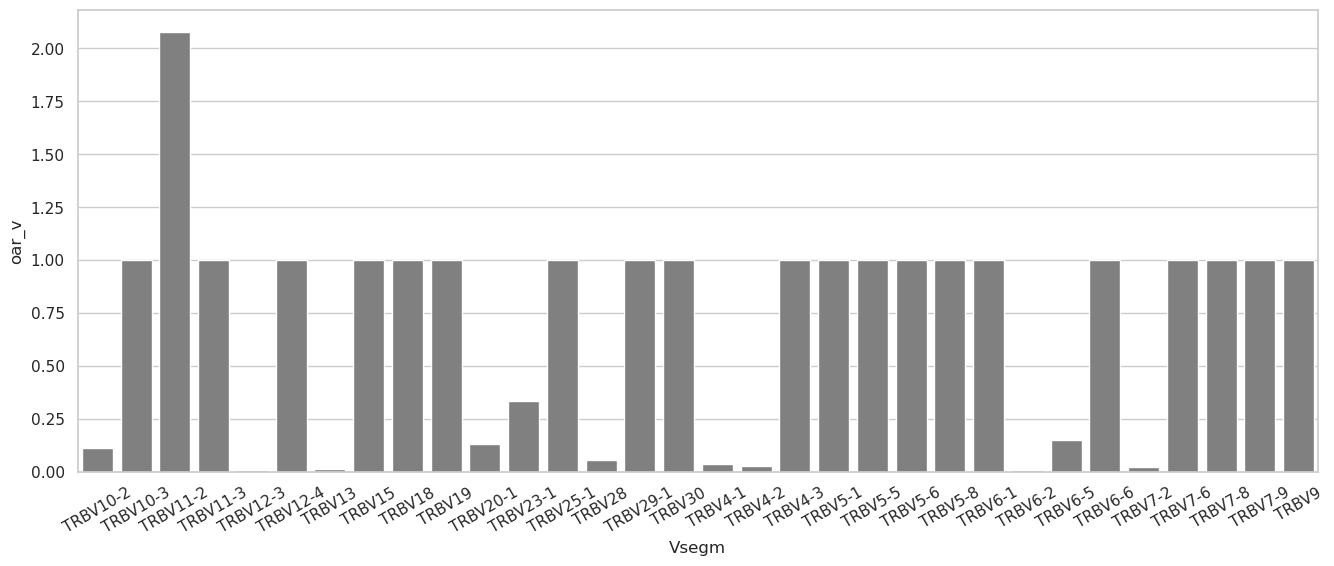

In [143]:
sns.set(rc={'figure.figsize':(16, 6)})
sns.set_style("whitegrid")
sns.barplot(data=by_v, x='Vsegm', y='oar_v', color='grey')
plt.xticks(rotation=30)
plt.show() 

In [141]:
by_j = df.groupby('Jsegm', as_index=False).agg({'oar_j' : 'mean'})
by_j

,Jsegm,oar_j
0,TRBJ1-1,1.000000
1,TRBJ1-2,0.127774
2,TRBJ1-3,1.000000
3,TRBJ1-4,0.111522
4,TRBJ1-5,0.151311
5,TRBJ1-6,1.000000
6,TRBJ2-1,1.848750
7,TRBJ2-2,1.000000
8,TRBJ2-3,0.058843
9,TRBJ2-4,0.030262


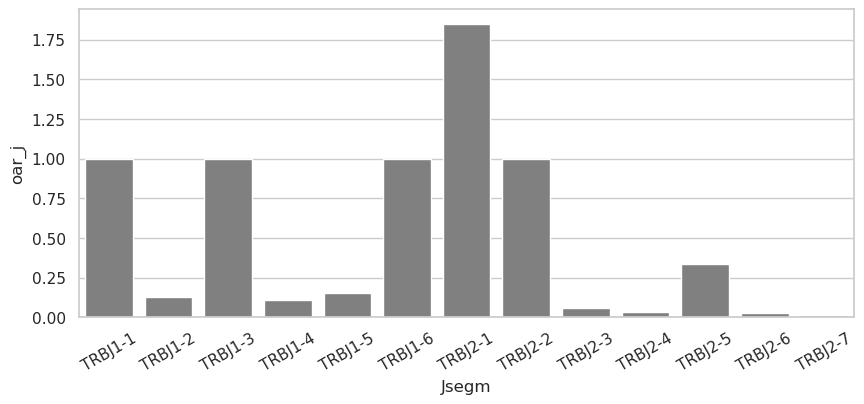

In [146]:
sns.set(rc={'figure.figsize':(10, 4)})
sns.set_style("whitegrid")
sns.barplot(data=by_j, x='Jsegm', y='oar_j', color='grey')
plt.xticks(rotation=30)
plt.show() 